In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',181)

In [3]:
df=pd.read_csv('air-traffic-passenger-statistics.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [5]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

In [6]:
df['Operating Airline IATA Code'].fillna('None',inplace=True)
df['Published Airline IATA Code'].fillna('None',inplace=True)

In [7]:
df.shape

(18885, 12)

In [8]:
df.drop_duplicates()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090
...,...,...,...,...,...,...,...,...,...,...,...,...
18880,201806,WOW Air,WW,WOW Air,WW,International,Europe,Enplaned,Other,International,G,50
18881,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,10868
18882,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Enplaned,Other,International,A,11664
18883,201806,XL Airways France,SE,XL Airways France,SE,International,Europe,Deplaned,Other,International,A,804


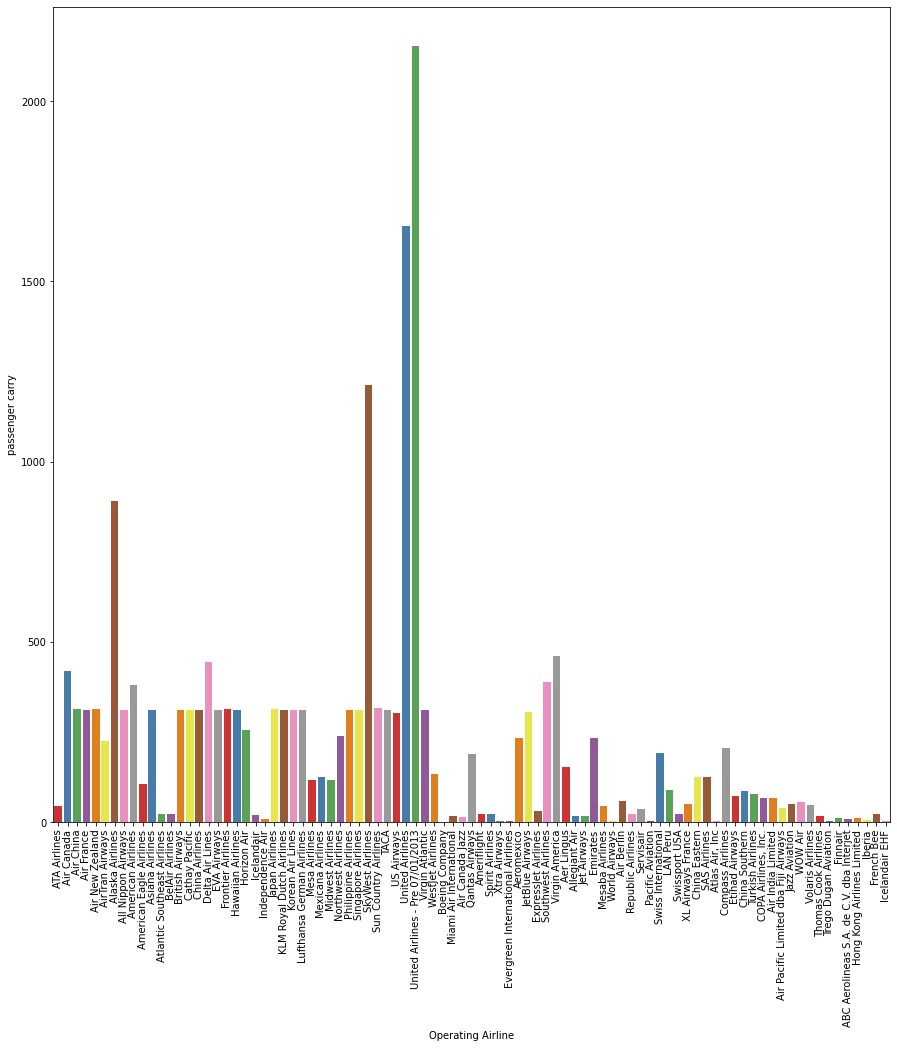

In [9]:
plt.figure(figsize=(15,15))
sns.countplot(x='Operating Airline',palette='Set1',data=df)
plt.xticks(rotation=90)
plt.ylabel('passenger carry')
plt.show()

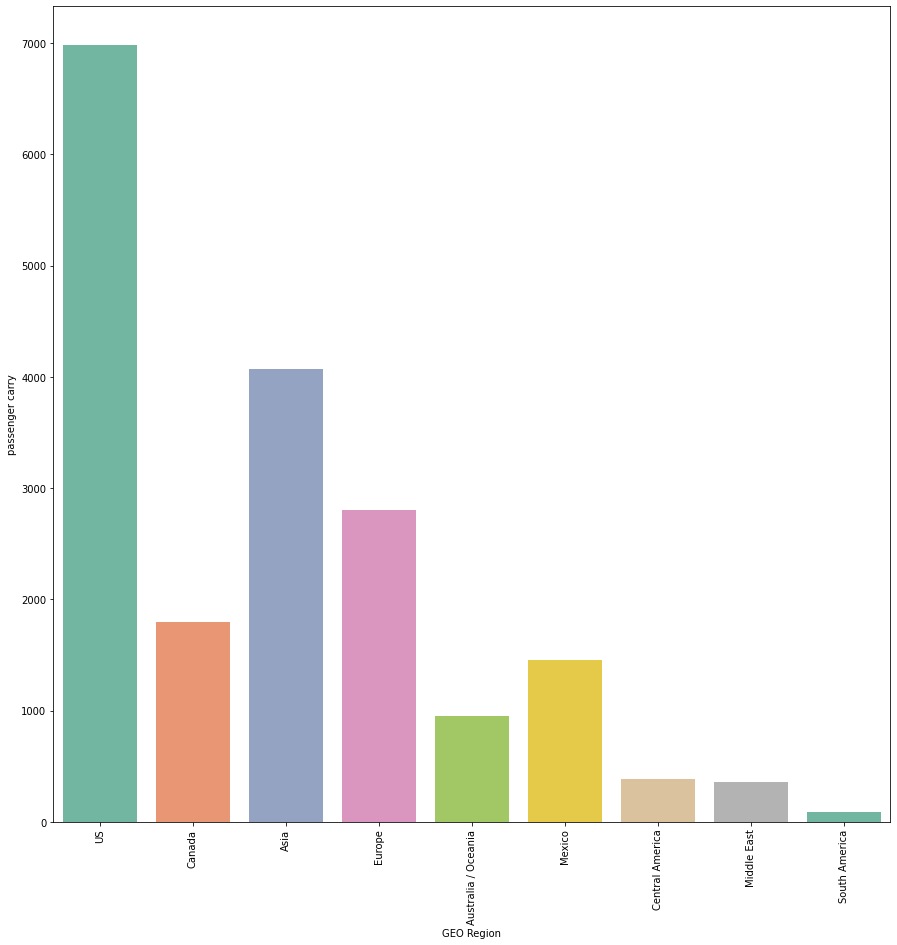

In [10]:
plt.figure(figsize=(15,15))
sns.countplot(x='GEO Region',palette='Set2',data=df)
plt.xticks(rotation=90)
plt.ylabel('passenger carry')
plt.show()

In [11]:
passenger_count=df.groupby('Operating Airline').sum()['Passenger Count']

In [12]:
airline_count=df['Operating Airline'].value_counts()

In [13]:
airline_count

United Airlines - Pre 07/01/2013    2154
United Airlines                     1653
SkyWest Airlines                    1212
Alaska Airlines                      891
Virgin America                       462
                                    ... 
Xtra Airways                           2
Evergreen International Airlines       2
Pacific Aviation                       2
Icelandair EHF                         2
Boeing Company                         1
Name: Operating Airline, Length: 89, dtype: int64

In [14]:
data=pd.DataFrame({'Passenger count':passenger_count,'Airline count':airline_count})

In [15]:
x=data[['Passenger count','Airline count']]

In [16]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust(clusters):
     for no_of_cluster in np.arange(1,clusters):
        no_of_cluster +=1
        model=KMeans(n_clusters=no_of_cluster)
        model=model.fit(x)
        pred=model.predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score=silhouette_score(x,pred)
        print('Number of cluster{},silhouette{}'.format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(15)

Number of cluster2,silhouette0.9286008999043343
Number of cluster3,silhouette0.9124445056983075
Number of cluster4,silhouette0.8270891141738362
Number of cluster5,silhouette0.7267852090532811
Number of cluster6,silhouette0.7269693507973984
Number of cluster7,silhouette0.7235624228556456
Number of cluster8,silhouette0.7372228603872746
Number of cluster9,silhouette0.7192917541572154
Number of cluster10,silhouette0.7107647583653071
Number of cluster11,silhouette0.6975645432542432
Number of cluster12,silhouette0.6704374789961269
Number of cluster13,silhouette0.6665656728055497
Number of cluster14,silhouette0.6725640395085105
Number of cluster15,silhouette0.6562499965664569


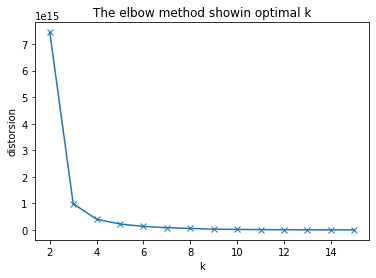

In [17]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('distorsion')
plt.title('The elbow method showin optimal k')
plt.show()

In [18]:
model=KMeans(n_clusters=4)

In [19]:
eğit=model.fit(x)

In [20]:
sınıflandır=eğit.predict(x)

In [21]:
sınıflandır

array([0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 2, 0, 0, 0, 0, 0, 0,
       0])

In [22]:
(silhouette_score(x,sınıflandır))

0.8270891141738362

In [23]:
x['sınıf']=sınıflandır

In [24]:
x['sınıf'].value_counts()

0    78
2     5
3     4
1     2
Name: sınıf, dtype: int64

In [25]:
x

,Passenger count,Airline count,sınıf
ABC Aerolineas S.A. de C.V. dba Interjet,15585,8,0
ATA Airlines,384764,44,0
Aer Lingus,777691,152,0
Aeromexico,1672946,234,0
Air Berlin,235155,60,0
...,...,...,...
WOW Air,295168,56,0
WestJet Airlines,799801,135,0
World Airways,785,3,0
XL Airways France,118961,51,0
